In [38]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re
import ast

import matplotlib.pyplot as plt

## Let's now load the dataset into the memory:

In [39]:
df = pd.read_csv('booksummaries.txt', delimiter="\t", names=["WID", "BookName", "Author", "Date", "Tags", "Summary"],
                 encoding="UTF-8")

df = df[["Tags", "Summary"]]

emptyDf = df[df['Tags'].isna()]
validDf = df.dropna(subset=['Tags'], how='all')

# delete soon
# validDf = validDf[:25]

validDf.head(7)

,Tags,Summary
620,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
843,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
986,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
2080,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...
2152,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...","The book tells the story of Paul Bäumer, a Ge..."
2890,"{""/m/0dwly"": ""Children's literature"", ""/m/01hm...","Ged is a young boy on Gont, one of the larger..."
4081,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...","Living on Mars, Deckard is acting as a consul..."


In [40]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

indx = 0
unique_value = []

for i in validDf.values:
    tag_list = list(ast.literal_eval(i[0]).values())

    for tag in tag_list:
        unique_value.append(tag)

    word_tokens = preprocess_text(i[1])
    validDf.iat[indx, 1] = word_tokens
    validDf.iat[indx, 0] = tag_list

    indx += 1
unique_value = set(unique_value)

unique_value_dict = {k: v for v, k in enumerate(unique_value)}

validDf

,Tags,Summary
620,"[Roman à clef, Satire, Children's literature, ...",Old Major the old boar on the Manor Farm call...
843,"[Science Fiction, Novella, Speculative fiction...",Alex teenager living in near future England l...
986,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...
2080,"[Hard science fiction, Science Fiction, Specul...",The novel posits that space around the Milky ...
2152,"[War novel, Roman à clef]",The book tells the story of Paul umer German ...
...,...,...
36372465,[Science Fiction],The story starts with former government agent...
36534061,"[Thriller, Fiction, Suspense]",The series follows the character of Nick Ston...
37054020,"[Thriller, Fiction]",The reader first meets Rapp while he is doing...
37122323,[Autobiography],The book follows very rough chronological ord...


In [41]:

def one_hot_encoding(ValidDf):
    All_list = np.zeros(shape=(ValidDf.shape[0],len(unique_value_dict.keys())))
    
    indx = 0
    for i in ValidDf.values:
        for j in i[0]:
            All_list[indx][unique_value_dict[j]] = 1
        indx += 1       

    return All_list


one_hot_list = one_hot_encoding(validDf)


print(one_hot_list)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


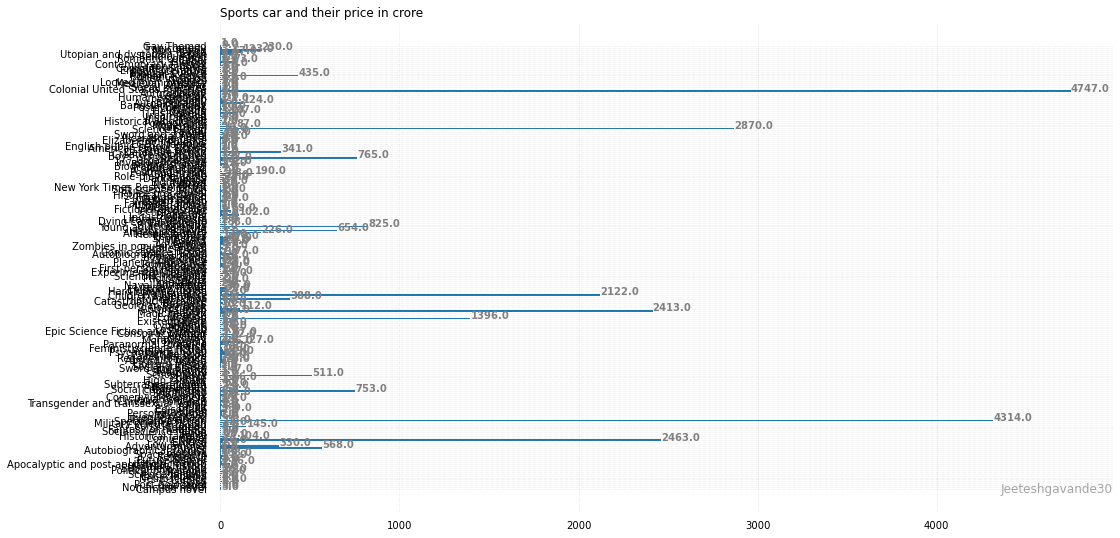

In [42]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(list(unique_value_dict.keys()),one_hot_list.sum(axis=0))
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Sports car and their price in crore',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()


In [43]:
X_train, X_test, y_train, y_test = train_test_split(validDf.Summary, one_hot_list, test_size=0.20, random_state=42)

print(X_train.head(5))
print(y_train)

3091098      While on visit to the fictional Belmont Bevat...
24071931     Ellen is fourteen year old girl going into he...
6157405      Rob fourteen year old boy living in the Great...
10295438     In the beginning Adam has to move to Honolulu...
370284       The action takes place around Glens Falls in ...
Name: Summary, dtype: object
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

X_train

array([[  48,   16,  320, ...,    0,    0,    0],
       [1799,    6, 3698, ...,    0,    0,    0],
       [  11,  209,  283, ..., 3984,    5,  401],
       ...,
       [  35,    5,    1, ...,    5,  481, 1690],
       [ 930, 1518,    3, ...,    0,    0,    0],
       [ 490,  450,   25, ...,    0,    0,    0]])

In [45]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [46]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
# softmax olabilir
dense_layer_1 = Dense(len(unique_value_dict), activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 100)          9192100   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 227)               29283     
Total params: 9,338,631
Trainable params: 146,531
Non-trainable params: 9,192,100
_________________________________________________________________
None


In [47]:
!pip install pydot
!pip install pydotplus
!pip install graphviz

In [48]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [50]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
65/65 [==============================] - 15s 228ms/step - loss: 0.0326 - acc: 0.2851 - val_loss: 0.0329 - val_acc: 0.3275
Epoch 2/10
65/65 [==============================] - 15s 224ms/step - loss: 0.0325 - acc: 0.3366 - val_loss: 0.0334 - val_acc: 0.3343
Epoch 3/10
65/65 [==============================] - 15s 236ms/step - loss: 0.0327 - acc: 0.3067 - val_loss: 0.0330 - val_acc: 0.3343
Epoch 4/10
65/65 [==============================] - 15s 236ms/step - loss: 0.0327 - acc: 0.3150 - val_loss: 0.0330 - val_acc: 0.3343
Epoch 5/10
65/65 [==============================] - 15s 236ms/step - loss: 0.0327 - acc: 0.3247 - val_loss: 0.0330 - val_acc: 0.0234
Epoch 6/10
65/65 [==============================] - 16s 248ms/step - loss: 0.0327 - acc: 0.2440 - val_loss: 0.0329 - val_acc: 0.3343
Epoch 7/10
65/65 [==============================] - 16s 239ms/step - loss: 0.0326 - acc: 0.2952 - val_loss: 0.0329 - val_acc: 0.3343
Epoch 8/10
65/65 [==============================] - 16s 244ms/step - 